# Assignment 3 - Supervised Learning

## GUILLEM AMAT CASTELLO
Netid: ga98

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**a)**

$$P(y|X) = \prod_{i=1}^{N} P(y_{i}|x_{i}) = \prod_{i=1}^{N} P(y = 1|x_{i})^{y_{i}} \; P(y = 0|x_{i})^{1 - y_{i}} = \prod_{i = 1}^{N} \sigma (w^{T}x_{i})^{y_{i}} \; [1 - \sigma(w^{T}x_{i})]^{1-y_{i}} = $$
$$= \prod_{i=1}^{N} \left( \frac{1}{1  + e^{-w^{T}x}} \right)^{y_{i}} \; \left( 1 - \frac{1}{1  + e^{-w^{T}x}} \right)^{1 - y_{i}} =
\prod_{i=1}^{N} \left( \frac{1}{1  + e^{-w_{0}x_{i0} + w_{1}x_{i1} + w_{2}x_{i2}}} \right)^{y_{i}} \; \left( 1 - \frac{1}{1  + e^{-w_{0}x_{i0} + w_{1}x_{i1} + w_{2}x_{i2}}} \right)^{1 - y_{i}}$$

**b)**

$$C(w) = - \frac{1}{n} \sum_{i = 1}^{N} y_{i} \; log(y'_{i}) \; + \; (1 - y_{i}) \; (1- log(y'_{i})) = - \frac{1}{n} \sum_{i = 1}^{N} \left[ y_{i} \; log(\sigma (w^{T}x_{i})^{y_{i}}) \; + \; (1 - y_{i}) \; (1- log(\sigma(w^{T}x_{i}))) \right] = $$
$$ =  - \frac{1}{n} \sum_{i = 1}^{N} \left[ y_{i} log\left(\frac{1}{1  + e^{-w^{T}x}}\right) \; + \; (1 - y_{i}) \left( 1- log\left(\frac{1}{1  + e^{-w^{T}x}}\right)\right) \right] $$

$$C(w) = \frac{1}{n} \sum_{i=1}^{N}\left[(1 - y_{i})(w_0 x_{i0} + w_1 x_{i1} + w_2 x_{i2}) + log \big(1 + e^{-(w_0 x_{i0} + w_1 x_{i1} + w_2 x_{i2})} \big) \right] $$

**c)**

$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$$

$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[ \left(\frac{1}{1-e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}-y_i\right)x_0, \; \left(\frac{1}{1-e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}-y_i\right)x_1, \; \left(\frac{1}{1-e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}-y_i\right)x_2 \right]$$

**d)**

$$w_{i+1} = w_{i} + \eta \left[ \frac{\partial Log Likelihood(w_{i})}{\partial w_{i}} \right] = w_{i} + \eta \left[ \sum_{i}^{n} y_{i} - \sigma(w^{T} x_{i}) \right]$$

**e)**

In [460]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

A3_Q1 = pd.read_csv('C:\\Users\\guill\\Desktop\\Assignment 3 Machine Learning\\A3_Q1_data.csv')
A3_Q1.head()

,x1,x2,y
0,2.553124,0.337757,0.0
1,-0.877757,0.045790,1.0
2,-0.903528,0.368076,1.0
3,-1.532152,-0.863737,1.0
4,-0.046954,-0.388761,1.0


In [461]:
A3_Q1.groupby('y').agg(['count'])

,x1,x2
,count,count
y,,
0.0,50000,50000
1.0,50000,50000


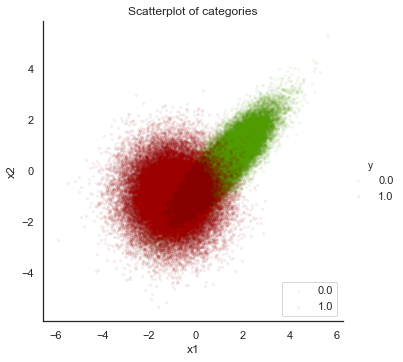

In [462]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('x1', 'x2', data = A3_Q1, fit_reg = False, hue = 'y', palette = {0:"#509c00", 1:"#9c0000"}, scatter_kws={"s": 5, 'alpha':0.05})
plt.legend(loc='lower right')
plt.title('Scatterplot of categories')
plt.show()

**f)**

In [463]:
A3_Q1.shape
A3_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
x1    100000 non-null float64
x2    100000 non-null float64
y     100000 non-null float64
dtypes: float64(3)
memory usage: 2.3 MB


In [464]:
A3_Q1.isnull().any()

x1    False
x2    False
y     False
dtype: bool

There are no missing values in our dataset.

**g)**

In [465]:
import math

#Creating a weights and variables array
w = np.array([1,1,1])
X = np.array(A3_Q1)[:,:2]
array_one = np.ones((len(X), 1))
X = np.hstack((X, array_one))

#Creating the sigmoid function
def sigmoid(weights, variables):
    return 1/ (1 + np.exp(-(np.dot(variables, weights))))
    pass

#Applying the sigmoid function
probabilities = sigmoid(w, X)
probabilities[0:5]

array([0.97998158, 0.54190968, 0.61409254, 0.19846936, 0.6374436 ])

**h)**

In [466]:
t = np.array(A3_Q1.iloc[:, 2]).reshape(1, -1)

def cost_function(target, weights, variables):
    p = sigmoid(weights, variables)
    return  1/len(variables) * np.sum((- target * np.log(p) - (1 - target) * np.log(1 - p)))

cost_function(t, w, X)

2.036273608943672

**i)**

In [467]:
from sklearn.model_selection import train_test_split

#Creating arrays for train and test set
X_train, X_test, y_train, y_test = train_test_split(A3_Q1.iloc[:,:2], A3_Q1.iloc[:,2], test_size = 0.3, random_state = 42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

#Adding a column of ones to the variable datasets
X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))

#Define gradient function
def gradient_descent(weights, variables, target, eta):
    output = []
    weights_new = weights
    difference = 1
    iter = 0
    
    while difference > 0.000001 and iter < 2000:
        weights_old = weights_new.reshape(-1,1)
        sigma = sigmoid(weights_old, variables)
        weights_new = weights_old - eta * np.dot(variables.T ,(sigma - target)) / len(variables)
        difference = np.linalg.norm(weights_new - weights_old)
        output.append(weights_new)
        iter += 1
         
    return output 

**j)**

In [468]:
def parameter_cost_function(parameters, variables, target):
    cost = []
    for p in parameters:
        cost.append(cost_function(target, variables.shape[1], sigmoid(p, variables)))
    return cost

**k)**

In [469]:
#eta = {0.05, 0.10, 0.25, 0.75}, gradient descent
eta_005 = gradient_descent(w, X_train, y_train, 0.05)
eta_010 = gradient_descent(w, X_train, y_train, 0.10)
eta_025 = gradient_descent(w, X_train, y_train, 0.25)
eta_075 = gradient_descent(w, X_train, y_train, 0.75)

#Train eta = {0.05, 0.10, 0.25, 0.75}
train_eta_005 = parameter_cost_function(eta_005, X_train, y_train)
train_eta_010 = parameter_cost_function(eta_010, X_train, y_train)
train_eta_025 = parameter_cost_function(eta_025, X_train, y_train)
train_eta_075 = parameter_cost_function(eta_075, X_train, y_train)

#Test eta = {0.05, 0.10, 0.25, 0.75}
test_eta_005 = parameter_cost_function(eta_005, X_test, y_test)
test_eta_010 = parameter_cost_function(eta_010, X_test, y_test)
test_eta_025 = parameter_cost_function(eta_025, X_test, y_test)
test_eta_075 = parameter_cost_function(eta_075, X_test, y_test)

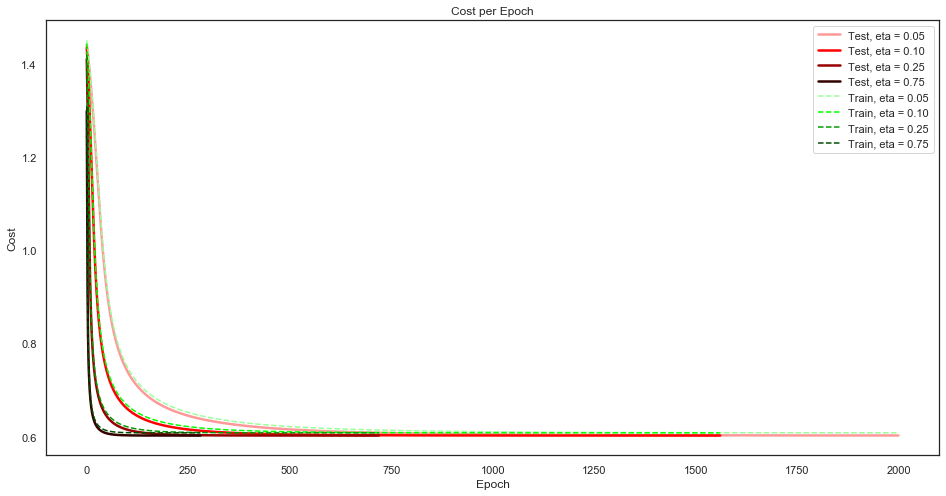

In [470]:
from matplotlib.pyplot import figure

figure(figsize=(16,8))

#Test
plt.plot(test_eta_005, label = 'Test, eta = 0.05', color = '#ff9999', linewidth = 2.5)
plt.plot(test_eta_010, label = 'Test, eta = 0.10', color = '#ff0000', linewidth = 2.5)
plt.plot(test_eta_025, label = 'Test, eta = 0.25', color = '#990000', linewidth = 2.5)
plt.plot(test_eta_075, label = 'Test, eta = 0.75', color = '#330000', linewidth = 2.5)

#Train
plt.plot(train_eta_005, label = 'Train, eta = 0.05', color = '#99ff99', linestyle = '--')
plt.plot(train_eta_010, label = 'Train, eta = 0.10', color = '#00ff00', linestyle = '--')
plt.plot(train_eta_025, label = 'Train, eta = 0.25', color = '#009900', linestyle = '--')
plt.plot(train_eta_075, label = 'Train, eta = 0.75', color = '#004c00', linestyle = '--')

#Adding information
plt.title("Cost per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend(loc='upper right')
plt.show()

We can see from the plot that smaller eta rates need more iterations in order to converge and thus take up more time and computational resources to do so. On the other hand setting an eta rate that is very high can cause the function to never reach a minimum and to keep on iterating. The ideal eta rate would be one in between such as 0.5.  

**l)**

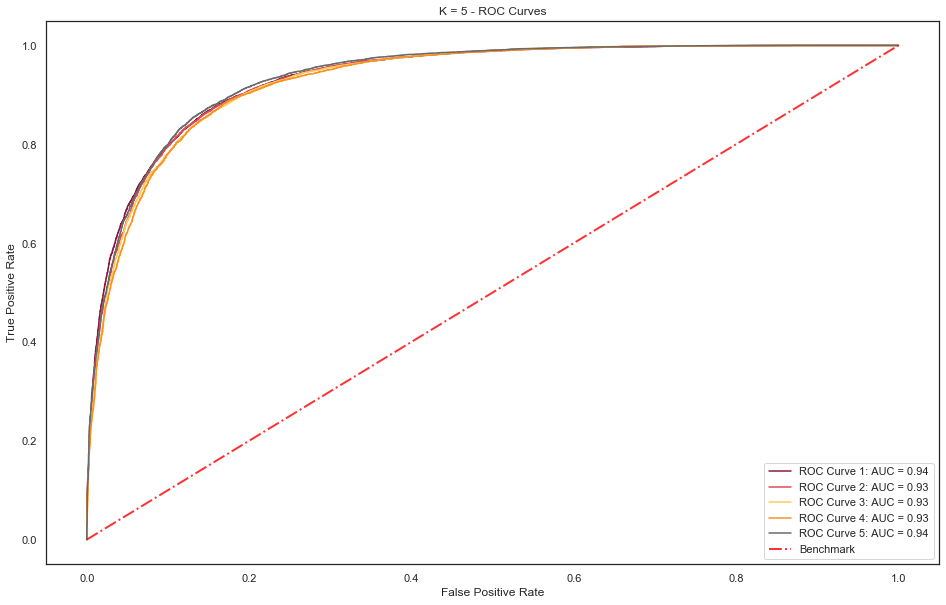

In [471]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

custom = {1: "#8c183f", 2: "#e34956", 3:"#ffca58", 4: "#f79323", 5: "#6a6a6a"}
plt.figure(figsize=(16, 10))
kfold = StratifiedKFold(n_splits = 5)
i = 0

for train_index, test_index in kfold.split(A3_Q1.iloc[:, :2], A3_Q1.iloc[:, 2]):
    X_train_k = np.array(A3_Q1.loc[train_index,:])[:, 0:2]
    X_test_k = np.array(A3_Q1.loc[test_index, :])[:, 0:2]
    y_train_k = np.array(A3_Q1.iloc[train_index, 2]).reshape(-1, 1)
    y_test_k = np.array(A3_Q1.iloc[test_index, 2]).reshape(-1, 1)
    X_train_k = np.hstack((np.ones((len(X_train_k), 1)), X_train_k))
    X_test_k = np.hstack((np.ones((len(X_test_k), 1)), X_test_k))


    computed_weights = gradient_descent(w, X_train_k, y_train_k, 0.25)
    p = sigmoid( computed_weights[len(computed_weights) - 1], X_test_k)
    
    fpr, tpr, thr = roc_curve(y_test_k, p)
    AUC = auc(fpr, tpr)
    
    i += 1
    
    plt.plot(fpr, tpr, label = "ROC Curve %d: AUC = %0.2f" % (i, AUC), color = custom[i])
    
plt.plot([0, 1], linestyle='-.', lw=2, label='Benchmark', alpha=.8, color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K = 5 - ROC Curves')
plt.legend(loc="lower right")
plt.show()    
    

**m)**

Cross-validation is a method that allows us to make partitions of our data and train and test it with different combinations. This leads to an improved measure of how well our model will perform on previously unseen data. It also allows us to tune our parameters and then retry on a different k-fold combination.

**n)**

Text(0.5, 1.0, 'Decision Boundary')

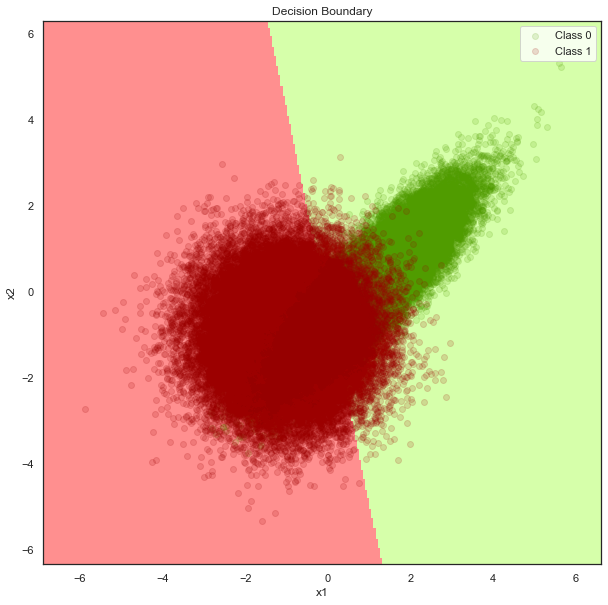

In [472]:
from matplotlib.colors import ListedColormap


bkg_colormap = ListedColormap(['#d6ffaa', '#ff8f8f'])
h = 0.05

y = A3_Q1.iloc[:, 2]

x = A3_Q1.iloc[:, :2]
array_one = np.ones((len(x), 1))
x = np.hstack((x, array_one))

w = np.array([-0.18002422,-1.91471186,-0.41814257])

x1, x2 = np.meshgrid(np.arange(-6, 6), np.arange(-6, 6))
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
x1, x2 = np.meshgrid(
    np.arange(x1_min, x1_max, h),
    np.arange(x2_min, x2_max, h)
)

plt.figure(figsize = (10, 10))
predictions = np.round(sigmoid(w, np.c_[np.ones(len(x1.ravel())), x1.ravel(), x2.ravel()]))
predictions = predictions.reshape(x1.shape)
plt.pcolormesh(x1, x2, y_hat, cmap = bkg_colormap)
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], c = '#509c00', label = 'Class 0', alpha = 0.15)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], c = '#9c0000', label = 'Class 1', alpha = 0.15)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Decision Boundary')

**o)**

Text(0.5, 1.0, 'Decision Boundary')

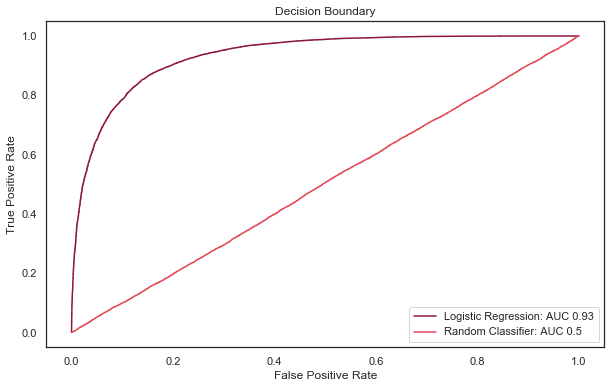

In [474]:
from sklearn.metrics import precision_recall_curve, f1_score, auc, roc_curve

#Creating a random guess classifier
random_guess = np.random.rand(len(y_test), 1)
fpr, tpr, thresh = roc_curve(y_test, random_guess, pos_label = 1)
random_auc = auc(fpr, tpr)

#Creating a Logistic Regression Classifier
probabilities = sigmoid(np.array([-0.18002422,-1.91471186,-0.41814257]), X_test)
fpr_l, tpr_l, thresh_l = roc_curve(y_test, probabilities, pos_label = 1)
logistic_auc = auc(fpr_l, tpr_l)

plt.figure(figsize = (10, 6))
plt.plot(fpr_l, tpr_l, color = "#8c183f", label = 'Logistic Regression: AUC {}'.format(round(logistic_auc, 2)))
plt.plot(fpr, tpr, color = "#e34956", label = 'Random Classifier: AUC {}'.format(round(random_auc,2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Decision Boundary')

We can clearly see that the Logistic Regression performs much better than a Random Classifier model. An Area Under the Curve of 0.93 is a really high value for this type of metric, which means our Logistic Regression does a great job classifying.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

**a)**

I tried importing the MNIST dataset from mlxtend following the link supplied in the assignment description but I had an issue when loading the labels. Somehow it was throwing a ValueError as the data could not be reshaped from size 9912406 into shape (28873,784). I tried fixing this for over an hour but I gave up and imported the data from Keras as suggested by another student.

In [51]:
#import mlxtend
#from mlxtend.data import loadlocal_mnist

#X_train, y_train = loadlocal_mnist(
#            images_path= 'C:\\Users\\guill\\Desktop\\train-images-idx3-ubyte', 
#            labels_path= 'C:\\Users\\guill\\Desktop\\Labels\\train-labels-idx1-ubyte')
#X_test, y_test = loadlocal_mnist(
#            images_path='C:\\Users\\guill\\Desktop\\t10k-images-idx3-ubyte', 
#            labels_path='C:\\Users\\guill\\Desktop\\Labels\\t10k-labels-idx1-ubyte')

In [426]:
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train_binary = 1 * (y_train == 3)
y_test_binary = 1 * (y_test == 3)

**b)**

In [150]:
C_0 = np.array(np.where(y_train != 3)[0])[:10]
C_1 = np.array(np.where(y_train == 3)[0])[:10]

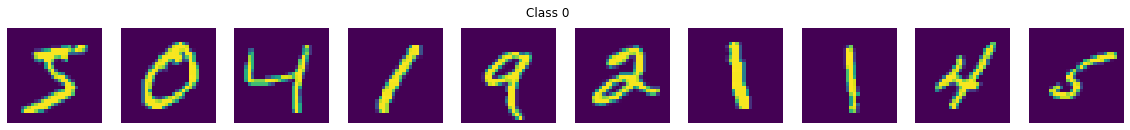

In [152]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize = (20,2))

for i, ind in enumerate(C_0):
    axes[i].imshow(X_train[ind].reshape(28,28))

[axis.set_axis_off() for axis in axes.ravel()]
    
plt.suptitle("Class 0")
plt.show()

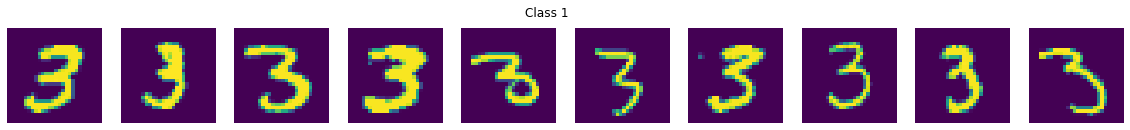

In [153]:
fig, axes = plt.subplots(1, 10, figsize = (20,2))

for axis_n, index in enumerate(C_1):
    axes[axis_n].imshow(X_train[index].reshape(28,28))

[axis.set_axis_off() for axis in axes.ravel()]
    
plt.suptitle("Class 1")
plt.show()

**c)**

I will use a bar plot instead of a histogram, which is better suited for this task.

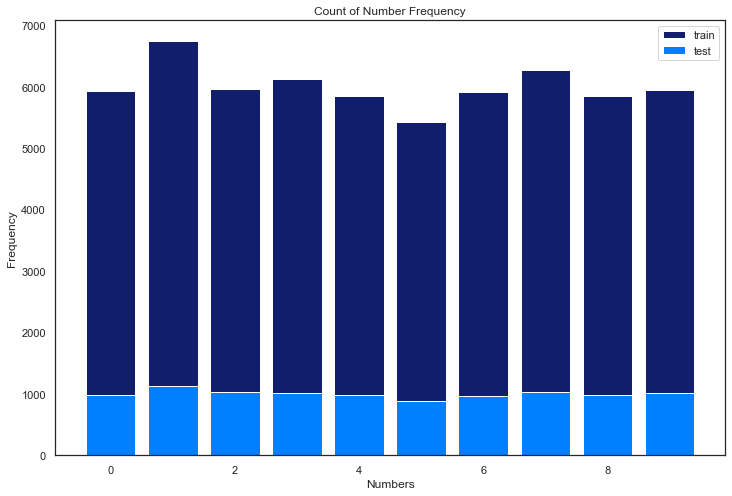

In [444]:
plt.figure(figsize=(12, 8))

#Counting the number of occurrences of each value in train set
unique, counts = np.unique(y_train, return_counts=True)

plt.bar(unique, counts, color = '#111E6C', label = 'train')

#Counting the number of ocurrences of each value in test set
unique, counts = np.unique(y_test, return_counts = True)

plt.bar(unique, counts, color = '#0080FF', label = 'test')
plt.title('Count of Number Frequency')
plt.ylabel('Frequency')
plt.xlabel('Numbers')
plt.legend()

No handles with labels found to put in legend.


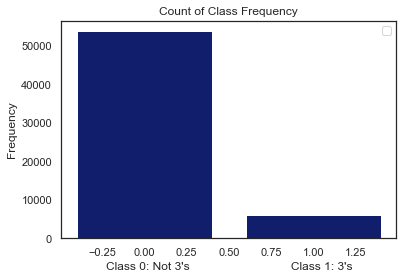

In [456]:
plt.bar(unique_class, counts_class, color = '#111E6C')
plt.title('Count of Class Frequency')
plt.ylabel('Frequency')
plt.xlabel('Class 0: Not 3\'s                              Class 1: 3\'s')
plt.legend()

The classes are clearly imbalanced. In the first plot we can see that all the numbers have approximately an equal number of observations, so when we make all 3's  our Class 1, they represent $\frac{1}{9}$ of Class 0. 

**d)**

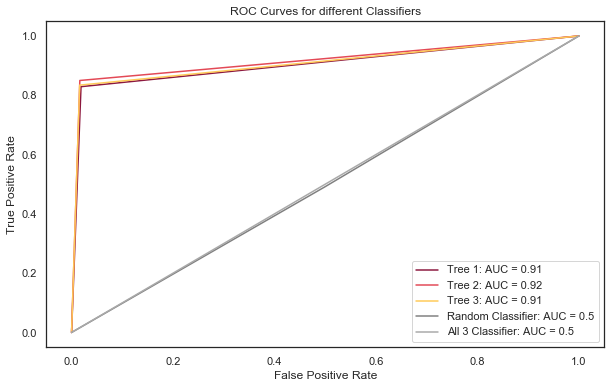

In [435]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc

folds = KFold(n_splits = 3)

i = 0
plt.figure(figsize = (10, 6))
custom = {1: "#8c183f", 2: "#e34956", 3:"#ffca58"}

for train_i, test_i in folds.split(X_train):
    #Train array
    X_train_k = X_train[train_i]
    X_train_k = X_train_k.reshape(X_train_k.shape[0], -1) 
    
    #Test array
    X_test_k = X_train[test_i]
    X_test_k = X_test_k.reshape(X_test_k.shape[0], -1) 
    
    #Target Variable
    y_train_k = y_train_binary[train_i]
    y_test_k = y_train_binary[test_i]
    
    #Creating a Logistic Regresssion
    tree = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 25)
    tree.fit(X_train_k, y_train_k)
    
    fpr, tpr, thresh = roc_curve(y_test_k, tree.predict_proba(X_test_k)[:, 1])
    auc_tree = auc(fpr, tpr)
    
    i += 1
    
    plt.plot(fpr, tpr, label = 'Tree {}: AUC = {}'.format(i, round(auc_tree,2)), color = custom[i])
    pass

#Random guesses
random_classifier = np.random.choice(2, len(y_test_binary))
fpr_r, tpr_r, thresh_r = roc_curve(y_test_binary, random_classifier)
auc_r = auc(fpr_r, tpr_r)
plt.plot(fpr_r, tpr_r, label = 'Random Classifier: AUC = {}'.format(round(auc_r,2)), color = 'grey')

#Classifier guessing all numbers are 3
classifier_all3 = np.zeros(len(y_test_binary))
fpr_all, tpr_all, thresh_all = roc_curve(y_test_binary, classifier_all3)
auc_all = auc(fpr_all, tpr_all)
plt.plot(fpr_all, tpr_all, label = 'All 3 Classifier: AUC = {}'.format(round(auc_all, 2)), color = 'darkgrey')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curves for different Classifiers')
plt.legend()
plt.show()

Our model performs way better than Random Guessing or assigning all observations to be 3\'s. In fact, the Area Under the Curve is pretty impressive at 0.91 on average in the different folds. Even though a pretty simple model was chosen, a Tree Classifier with maximum depth of 25, it still performed really well.

## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**ANSWER**

**a)**

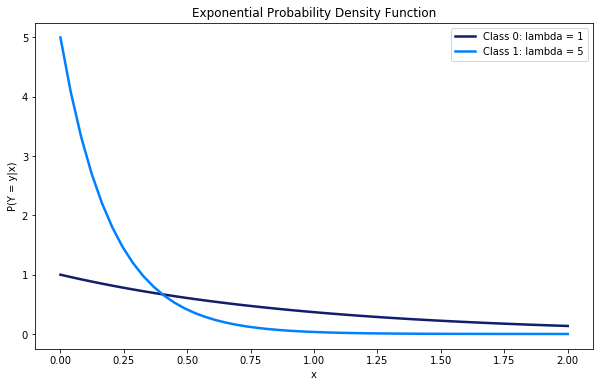

In [84]:
import matplotlib.pyplot as plt
from scipy.stats import expon

x_range = np.linspace(0,2)
expon_1 = expon.pdf(x_range, scale = 1)
expon_5 = expon.pdf(x_range, scale = 0.2)

plt.figure(figsize=(10,6))
plt.plot(x_range, expon_1, color = '#111E6C', lw = 2.5, label= 'Class 0: lambda = 1')
plt.plot(x_range, expon_5, color = '#0080FF', lw = 2.5, label= 'Class 1: lambda = 5')
plt.xlabel('x')
plt.ylabel('P(Y = y|x)')
plt.title('Exponential Probability Density Function')
plt.legend()
plt.show()

**b)**

The value of x* that minimizes missclassification will be that for which the Posterior Functions intercept each other. We can either compute these mathematically by calculating both posteriors and then isolating for x or we can visualize it through plots. Both methods were done, even though the equations are not shown. It was calculated that the intercept of both Posteriors was at around 0.402.

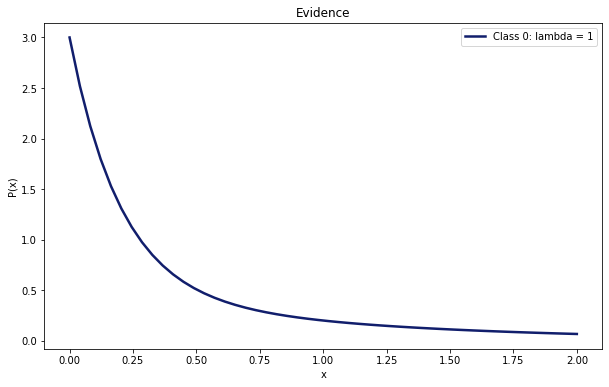

In [78]:
#Calculating the evidence
p = 0.5
evidence = expon_1 * p + expon_5 * p

plt.figure(figsize=(10,6))
plt.plot(x_range, evidence, color = '#111E6C', lw = 2.5, label='Class 0: lambda = 1')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Evidence')
plt.legend()
plt.show()

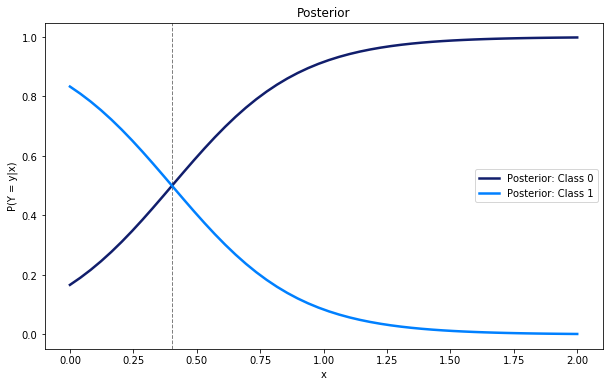

In [92]:
posterior_lambda_1 = (expon_1 * Probability)/evidence
posterior_lambda_5 = (expon_5 * Probability)/evidence

#Plotting the Posterior curves with the intersection
plt.figure(figsize=(10,6))
plt.axvline(0.4023594, lw = 1, linestyle = '--', color = 'gray')
plt.plot(x_range, posterior_lambda_1, color = '#111E6C', lw = 2.5, label= 'Posterior: Class 0')
plt.plot(x_range, posterior_lambda_5, color = '#0080FF', lw = 2.5, label= 'Posterior: Class 1')
plt.xlabel('x')
plt.ylabel('P(Y = y|x)')
plt.title('Posterior')
plt.legend()
plt.show()

**c)**

The x* is the intersection between the two lines in the Posterior plot. We can fit an imaginary vertical line that crosses that point. Observations with x values greater than 0.402 would belong to the region to the right of the line and be classified as Class 0 while the others would be classified as Class 1. The likelihood distribution from **a)** was used when calculating the Evidence and Posteriors in **b)**.

**d)**

In [315]:
#Loading the data and dropping unnecessary columns
A3_Q3_test = pd.read_csv('C:\\Users\\guill\\Desktop\\Assignment 3 Machine Learning\\A3_Q3_test.csv')
A3_Q3_test = A3_Q3_test.drop('Unnamed: 0', axis = 1)

#Predictions based on decision boundary
A3_Q3_test['predictions'] = np.where(A3_Q3_test['x']> 0.40235948, 0, 1)

#Calculating error rate
#A3_Q3_test[(A3_Q3_test.y != A3_Q3_test.predictions)].sum()/len(A3_Q3_test.predictions) ----- Not working
error = np.where(A3_Q3_test['y'] == A3_Q3_test['predictions'], 0, 1)
error_rate = error.sum()/len(error)
print('The missclassification rate for the Bayes decision rule is ', round(error_rate, 2))

The missclassification rate for the Bayes decision rule is  0.23


**e)**

In [316]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Loading train data and dropping unnecessary columns
A3_Q3_train = pd.read_csv('C:\\Users\\guill\\Desktop\\Assignment 3 Machine Learning\\A3_Q3_train.csv')
A3_Q3_train = A3_Q3_train.drop('Unnamed: 0', axis = 1)
X_train = np.array(A3_Q3_train.iloc[:, 0]).reshape(-1, 1)
y_train = np.array(A3_Q3_train.iloc[:, 1]).reshape(-1, 1)
X_test = np.array(A3_Q3_test.iloc[:, 0]).reshape(-1, 1)
y_test = np.array(A3_Q3_test.iloc[:, 1]).reshape(-1, 1)

#Implementing Logistic Regression
logistic_r = LogisticRegression()
logistic_r.fit(X_train, y_train)
A3_Q3_test['predictions'] = logistic_r.predict(X_test)

#Calculating error rate
error = np.where(A3_Q3_test['y'] == A3_Q3_test['predictions'], 0, 1)
error_rate_l = error.sum()/len(error)
error_rate_l
print('The missclassification rate for the Logistic Regression is ', round(error_rate_l, 2))

The missclassification rate for the Logistic Regression is  0.23


The Logistic Regression has a pretty similar performance to the Bayes Classifier. Both models error rate is practically the same, hovering around 0.23.

**f)**

In order to find our decision rule for the logistic regression we will formulate the equation where the sigmoid function equals 0.5 and isolate for x. The result will give us our decision boundary.

$$\frac{1}{1 + e^{-w_{0}-w_{1}x}} = 0.5$$
<br>
$$e^{-w_{0}-w_{1}x} = 1$$
<br>
$$ -w_{0}-w_{1}x = 0$$
<br>
$$x = \frac{-w_{0}}{w_{1}}$$

In [310]:
print('My decision rule for the Logistic regression model would be ', round(-logistic_r.intercept_[0]/ logistic_r.coef_[0][0], 2))

My decision rule for the Logistic regression model would be  0.4


**g)**

If the prior probabilities would change, and *P(Class 1)* would be greater than *P(Class 0)*, the decision boundary would move to the right and thus *x** would increase.

## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

**ANSWER**

**a)**

**Question:** Can we predict candidates chance of admission into US universities by looking at their application data such as grades or test scores?
<br>
<br>
**Background:**
About a year ago, around this time, I was busy gathering the necessary documents for my applications to different Masters programs. I started considering to do a Master in Data Science three years ago, when I found out about the potential of the field while working in Strategy Consulting. I informed myself about the multiple options I had and decided to apply to programs in the US. Programs in Europe were still very new because the demand for professionals in the sector was low (it still is) and in its early stages. With that in mind I started informing myself about universities and gathering the necessary documents that I would need such as GRE, TOEFL, Letters of Recommendation and others. The whole process, from my inital thought to accepting Duke's offer, took around 2 years. The toughest part about the application process was selecting which universities and programs to apply to, as it was very hard to determine my chances of being admitted. That's why I decided to create a model to calculate student's chances of being admitted with the final objective of using the model on my scores to determine which chances I really had. 
<br>
<br>
**Dataset:**
The dataset I decided to use comes from Kaggle and assesses the chances that Indian students have of getting accepted into US universities of different kinds. It has all the necessary variables in terms of application documents such as GRE scores, TOEFL scores, evaluated Letters of Recommendation... 
<br>
While the datset calculates chances from the perspective of Indian students, I believe it can give me a pretty good idea of my chances. I can add a subjective diversity value to my score, since my profile is pretty rare and not many people from Spain study in the USA. 

**b)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>
We will begin by importing our dataset and visually exploring the relationship that some variables have on Chances of Admission. 

In [175]:
admissions = pd.read_csv('C:\\Users\\guill\\Desktop\\Admission_Predict_Ver1.1.csv')
admissions = admissions.drop('Serial No.', axis = 1)
admissions = admissions.rename(columns = {'Chance of Admit ':'target'})

<br>
We will start by taking a look at the variables.

In [192]:
admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,target
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<br>
We will explore the distribution of our target variable, Chance of Admit. If the distribution is not normal we will need to apply a transformation to it such as Square Root, Power or a Logarithmic transformation to better approximate a Gaussian distribution. 

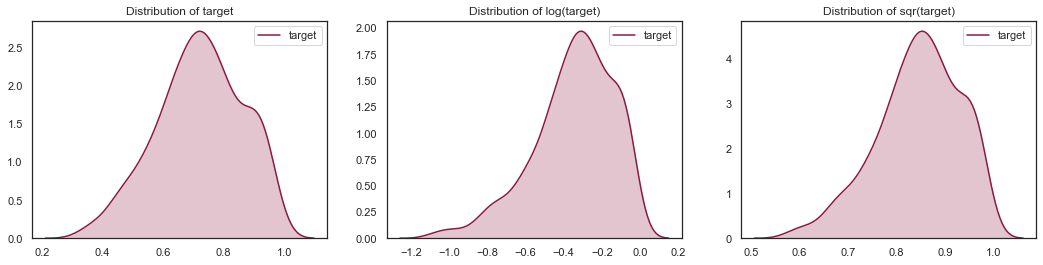

In [209]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.kdeplot( data = admissions["target"], color = "#8c183f", shade = True)
plt.title("Distribution of target")

plt.subplot(1,3,2)
sns.kdeplot( data = np.log(admissions["target"]) , color = "#8c183f", shade = True)
plt.title("Distribution of log(target)")


plt.subplot(1,3,3)
sns.kdeplot( data = np.sqrt(admissions["target"]), color = "#8c183f", shade = True)
plt.title("Distribution of sqr(target)")

plt.show()

<br>
The target variable is largely normally distributed. We tried applying a logarithmic and square root transformation to see if we can make it a little bit more normal, but those transformations don't yield any improvement. We will proceed on the analysis by keeping the raw target variable.
<br>
<br>
As a next step we will create a heatmap of a correlation matrix of the variables to inspect whether we can identify multicollinearity and flag some variables for further inspection.

Text(0.5, 1, 'Correlogram of variables')

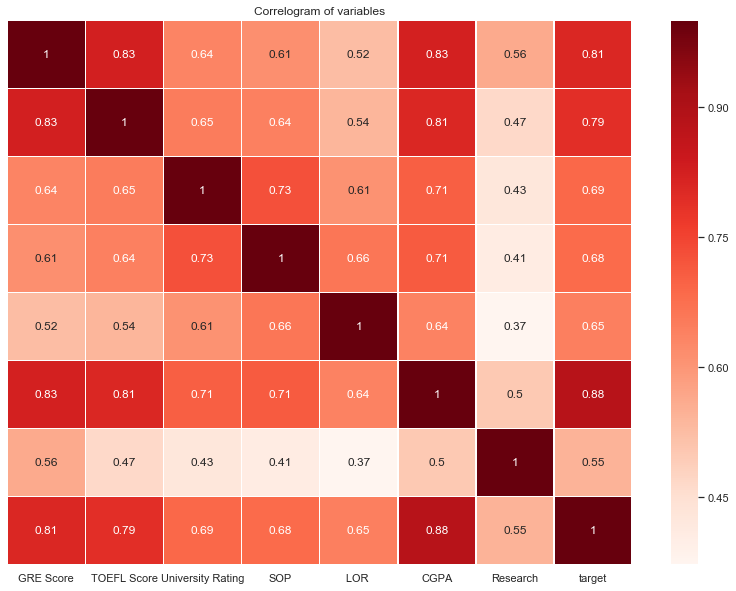

In [231]:
plt.figure(figsize=(14,10))
sns.heatmap(admissions.corr(), cmap = 'Reds', annot=True, linewidths=0.5, yticklabels=False)
plt.title("Correlogram of variables")

<br>
It seems that GRE and TOEFL, GRE and CGPA and TOEFL and CGPA might be correlated. We flaged them for further inspection and we will plot their joint marginal distribution to further check this.

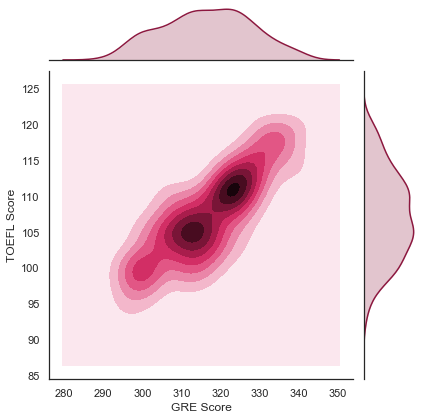

In [238]:
#GRE Score vs TOEFL Score
sns.set(style="white", color_codes = True)
sns.jointplot(x = admissions["GRE Score"], y = admissions["TOEFL Score"], kind='kde', color="#8c183f")

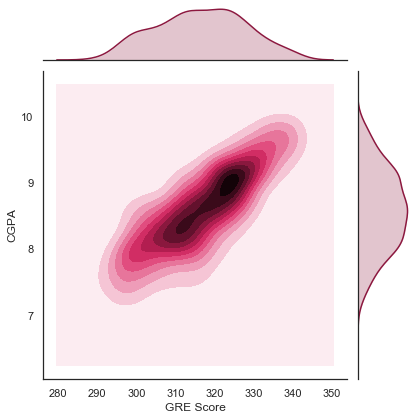

In [239]:
#GRE Score vs CGPA
sns.set(style="white", color_codes = True)
sns.jointplot(x = admissions["GRE Score"], y = admissions["CGPA"], kind='kde', color="#8c183f")

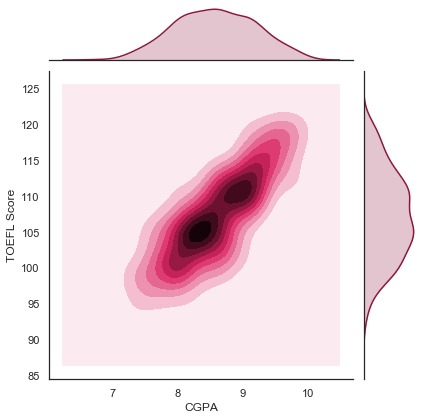

In [241]:
#CGPA vs TOEFL Score
sns.set(style="white", color_codes = True)
sns.jointplot(x = admissions["CGPA"], y = admissions["TOEFL Score"], kind='kde', color="#8c183f")

<br>
All these variables are correlated among themselves. Nevertheless we will still include them when building our model. They are all too important as components of a student's application, they can not be left out. My interpretation is that good students tend to have well-rounded applications, but that does not imply causality. A bad score in one of those variables could hurt a student's chances of admission.
<br>
<br>
It would be interesting to inspect the median and interquartile range that Chance of Admit has against the categorical variables, that is University Rating and Research. We will use boxplots to inspect it.

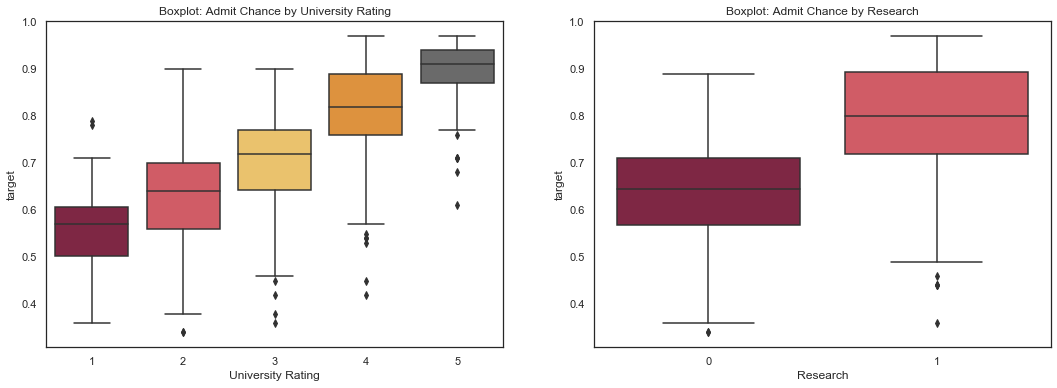

In [191]:
plt.figure(figsize=(18,6))

#Creatting boxplots
plt.subplot(1,2,1)
custom = {1: "#8c183f", 2: "#e34956", 3:"#ffca58", 4: "#f79323", 5: "#6a6a6a"}
sns.boxplot(x = admissions["University Rating"], y = admissions["target"], palette = custom)
plt.title("Boxplot: Admit Chance by University Rating")

plt.subplot(1,2,2)
custom = {0: "#8c183f", 1: "#e34956"}
sns.boxplot(x = admissions["Research"], y = admissions["target"], palette = custom)
plt.title("Boxplot: Admit Chance by Research")

plt.show()

<br>
There is a clear relation between the categorical variables and the target. We will proceed to plot two of the most important numerical variables against the target to inspect their relation. 

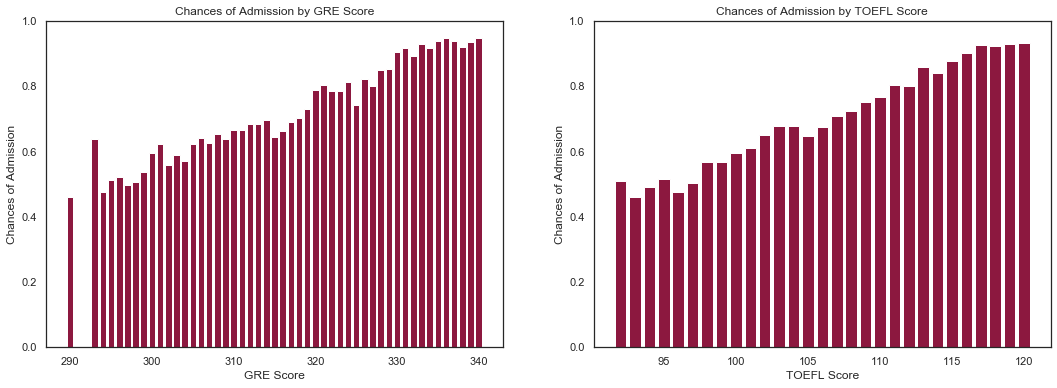

In [300]:
chances_gre = pd.DataFrame(admissions.groupby(admissions['GRE Score'])['target'].mean()).reset_index()
chances_toefl = pd.DataFrame(admissions.groupby(admissions['TOEFL Score'])['target'].mean()).reset_index()

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.bar(chances_gre.iloc[:, 0], chances_gre.iloc[:, 1], color = '#8c183f')
plt.title('Chances of Admission by GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('Chances of Admission')
plt.ylim(0, 1)

plt.subplot(1,2,2)
plt.bar(chances_toefl.iloc[:, 0], chances_toefl.iloc[:, 1], color = '#8c183f')
plt.title('Chances of Admission by TOEFL Score')
plt.xlabel('TOEFL Score')
plt.ylabel('Chances of Admission')
plt.ylim(0, 1)

plt.show()

**c)**

Most of the dataset information has already been discussed in point **b)** but we can see the columns below. Our target variable is the Chance of Admission, that is, target.

In [301]:
admissions.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'target'],
      dtype='object')

<br>
We will inspect whether there are missing values in our dataset. In case there are, we will need to determine whether we plan on dropping them or filling them by using an imputation method for instance.

In [162]:
admissions.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<br>
There are no missing values in our dataset. We will now determine if there are any outliers.

In [164]:
admissions.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


We can already see that there are no outliers in the data, and that it has already been normalized. All the variables are contained on a scale from 0 to 5 except for CGPA and Chance of Admit that have different ranges.

**d)**

This is a Regression problem that looks very linear. I will try and use Linear Regression and check how it performs as it is a simple model that tends to perform very well in this kind of cases. I will also use another model to further check the performance of my model. 

**e)**

I will use two scoring metrics to check the performance of my model and to make sure that they point to the same conclusion. I will use Mean Squared Error, to get a sense of how large the average error is. I will use R-Squared to find out how much of the variance of my data is explained by the model. I would be happy with a low value for MSE (as low as possible). I would be okay with a value of R-Squared between 0.6 and 0.8 and happy with anything above the range.

**f)**

I decided to split my original dataset to create a train and test set to fit to my model. Cross Validation would also work (potentially better) but given that I have enough observations it is not necessary. I also created a variable storing my application information.

In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(admissions.drop('target', axis = 1),
                                                    admissions.target, test_size = 0.2, random_state = 42)

my_application = pd.DataFrame.from_dict({'GRE Score': [332], 'TOEFL Score': [111], 'University Rating': [1],
                                         'SOP': [5], 'LOR': [4], 'CGPA': [7.5], 'Research': [0]})

**g)**

We will fit a Linear Regression Model to the data and check the scores.

In [257]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)
predictions = regression.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
R_Squared = r2_score(y_test, predictions)

print('MSE: ', MSE)
print('R-Squared:', R_Squared)

MSE:  0.0037046553987884097
R-Squared: 0.8188432567829629


<br>
The Linear Regression results are really good. We will also try a different model, a Random Forest to check whether we can achieve a better performance. Given that the relationship between the target variable and the predictiors is largely linear, I would expect the performance to be worse in this case.

In [267]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
R_Squared = r2_score(y_test, predictions)

print('MSE: ', MSE)
print('R-Squared:', R_Squared)

MSE:  0.004299729999999999
R-Squared: 0.7897442542787287


C:\Users\guill\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**h)**

I tried fitting two different models to my data with very good results. R-Squared represents the amount of variance that is explained by a model, which in this case is around 80% for both the Linear Regression and the Random Forest. That is a pretty good score. Mean Squared Error is, as the name indicates, the average value for all the squared errors. This one is a bit harder to interpret, but we generally want to keep it as low as possible. Both models yielded a very low Mean Squared Error, which further confirms the good performance of our model on previously unseen data.
<br>
<br>
There are many ways in which we could improve the performance of our model. For Linear Regression, we should have checked all the assumptions are held (we checked Normality and Multicollinearity) to validate our model. We should then have dropped variables that are not helpful in predicting whether someone will get admitted or not. We could have done this manually or using subset selection methods such as forward or backward stepwise selection. For Random Forest we could have prunned individual decision trees, played with the number of trees created and finally used boosting to fit trees sequentially to improve the fit of our model.

**Final:**

As an extra bonus point I will try using my model to predict my chances of admission into a tier 1 university such as Duke (University Rating = 1).

In [273]:
print('The Linear Regression model predicted I had a ', round(regression.predict(my_application)[0] * 100, 2), '% chance of getting admitted.')
print('The Random Forest model predicted I had a ', round(random_forest.predict(my_application)[0] * 100, 2), '% chance of getting admitted.')

The Linear Regression model predicted I had a  64.39 % chance of getting admitted.
The Random Forest model predicted I had a  62.1 % chance of getting admitted.


It seems I had a decent chance of getting admitted into Duke University! I would potentially consider adding a diversity and experience bonus to this result, but as of now, I am happy with my chances and I would have definetly applied if I had known!